In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df=pd.read_csv("soil_pollution_diseases.csv")
print(df.head(10))

       Case_ID Date_Reported         Region    Country Pollutant_Type  \
0  CASE_100000    2024-09-12         Africa   Pakistan           Lead   
1  CASE_100001    2024-01-01         Africa    Germany           Lead   
2  CASE_100002    2025-02-24         Europe    Germany           Lead   
3  CASE_100003    2024-09-24           Asia        USA           Lead   
4  CASE_100004    2023-05-24         Africa      India       Chromium   
5  CASE_100005    2024-02-20         Europe    Nigeria           Lead   
6  CASE_100006    2024-05-07           Asia  Australia     Pesticides   
7  CASE_100007    2023-09-05  North America    Nigeria     Pesticides   
8  CASE_100008    2023-07-29      Australia     Brazil       Chromium   
9  CASE_100009    2025-04-03         Europe     Brazil        Mercury   

   Pollutant_Concentration_mg_kg  Soil_pH  Temperature_C  Humidity_%  \
0                          78.04     8.30           35.6        64.9   
1                          16.33     7.96           

In [ ]:
df.describe()

,Pollutant_Concentration_mg_kg,Soil_pH,Temperature_C,Humidity_%,Rainfall_mm,Soil_Organic_Matter_%
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,102.745587,6.463747,27.225100,58.222867,200.31660,5.175093
std,55.907366,1.166305,10.084577,21.357711,115.27187,2.761633
min,5.030000,4.500000,10.000000,20.000000,0.00000,0.500000
25%,54.425000,5.457500,18.500000,39.900000,100.60000,2.760000
50%,104.085000,6.450000,27.000000,58.450000,199.00000,5.130000
75%,151.472500,7.490000,35.825000,76.800000,299.75000,7.550000
max,199.990000,8.500000,45.000000,95.000000,399.70000,10.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Case_ID                        3000 non-null   object 
 1   Date_Reported                  3000 non-null   object 
 2   Region                         3000 non-null   object 
 3   Country                        3000 non-null   object 
 4   Pollutant_Type                 3000 non-null   object 
 5   Pollutant_Concentration_mg_kg  3000 non-null   float64
 6   Soil_pH                        3000 non-null   float64
 7   Temperature_C                  3000 non-null   float64
 8   Humidity_%                     3000 non-null   float64
 9   Rainfall_mm                    3000 non-null   float64
 10  Crop_Type                      3000 non-null   object 
 11  Farming_Practice               3000 non-null   object 
 12  Nearby_Industry                2418 non-null   o

In [ ]:
df.drop(['Date_Reported','Case_ID','Case_Resolved','Follow_Up_Required','Country'], axis=1, inplace=True)
print(df.head())


   Region Pollutant_Type  Pollutant_Concentration_mg_kg  Soil_pH  \
0  Africa           Lead                          78.04     8.30   
1  Africa           Lead                          16.33     7.96   
2  Europe           Lead                         167.33     5.35   
3    Asia           Lead                          89.23     5.66   
4  Africa       Chromium                          93.93     7.64   

   Temperature_C  Humidity_%  Rainfall_mm Crop_Type Farming_Practice  \
0           35.6        64.9         62.4     Wheat       Integrated   
1           31.0        73.1          8.2    Potato     Permaculture   
2           16.4        33.8        121.7   Soybean          Organic   
3           31.4        30.5        116.9     Wheat     Permaculture   
4           17.0        58.6        237.0    Cotton       Integrated   

  Nearby_Industry Water_Source_Type Soil_Texture  Soil_Organic_Matter_%  \
0          Mining              Well        Sandy                   1.98   
1       

In [ ]:
df.describe()

,Pollutant_Concentration_mg_kg,Soil_pH,Temperature_C,Humidity_%,Rainfall_mm,Soil_Organic_Matter_%
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,102.745587,6.463747,27.225100,58.222867,200.31660,5.175093
std,55.907366,1.166305,10.084577,21.357711,115.27187,2.761633
min,5.030000,4.500000,10.000000,20.000000,0.00000,0.500000
25%,54.425000,5.457500,18.500000,39.900000,100.60000,2.760000
50%,104.085000,6.450000,27.000000,58.450000,199.00000,5.130000
75%,151.472500,7.490000,35.825000,76.800000,299.75000,7.550000
max,199.990000,8.500000,45.000000,95.000000,399.70000,10.000000


In [ ]:
df.shape

(3000, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         3000 non-null   object 
 1   Pollutant_Type                 3000 non-null   object 
 2   Pollutant_Concentration_mg_kg  3000 non-null   float64
 3   Soil_pH                        3000 non-null   float64
 4   Temperature_C                  3000 non-null   float64
 5   Humidity_%                     3000 non-null   float64
 6   Rainfall_mm                    3000 non-null   float64
 7   Crop_Type                      3000 non-null   object 
 8   Farming_Practice               3000 non-null   object 
 9   Nearby_Industry                2418 non-null   object 
 10  Water_Source_Type              3000 non-null   object 
 11  Soil_Texture                   3000 non-null   object 
 12  Soil_Organic_Matter_%          3000 non-null   f

In [ ]:
df.isnull().sum()

,0
Region,0
Pollutant_Type,0
Pollutant_Concentration_mg_kg,0
Soil_pH,0
Temperature_C,0
Humidity_%,0
Rainfall_mm,0
Crop_Type,0
Farming_Practice,0
Nearby_Industry,582


In [ ]:
df.drop('Nearby_Industry',axis=1,inplace=True)
print(df.head())

   Region Pollutant_Type  Pollutant_Concentration_mg_kg  Soil_pH  \
0  Africa           Lead                          78.04     8.30   
1  Africa           Lead                          16.33     7.96   
2  Europe           Lead                         167.33     5.35   
3    Asia           Lead                          89.23     5.66   
4  Africa       Chromium                          93.93     7.64   

   Temperature_C  Humidity_%  Rainfall_mm Crop_Type Farming_Practice  \
0           35.6        64.9         62.4     Wheat       Integrated   
1           31.0        73.1          8.2    Potato     Permaculture   
2           16.4        33.8        121.7   Soybean          Organic   
3           31.4        30.5        116.9     Wheat     Permaculture   
4           17.0        58.6        237.0    Cotton       Integrated   

  Water_Source_Type Soil_Texture  Soil_Organic_Matter_%  \
0              Well        Sandy                   1.98   
1  Irrigation Canal        Silty        

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
numerical_cols = ['Pollutant_Concentration_mg_kg', 'Soil_pH', 'Temperature_C',
                  'Humidity_%', 'Rainfall_mm', 'Soil_Organic_Matter_%']
print(f"\nColumns to normalize: {numerical_cols}")



Columns to normalize: ['Pollutant_Concentration_mg_kg', 'Soil_pH', 'Temperature_C', 'Humidity_%', 'Rainfall_mm', 'Soil_Organic_Matter_%']


 Applying Z-Score Normalization

Standardizing numeric features to mean=0 and std=1 for fair comparison and outlier detection.

In [ ]:
df_normalized = df.copy()

# Display original statistics
print("\nOriginal Statistics (before normalization):")
print(df_normalized[numerical_cols].describe())

# Apply Z-score normalization
for col in numerical_cols:
    df_normalized[f'{col}_zscore'] = stats.zscore(df_normalized[col])

print("\nZ-score Statistics after normalization:")
zscore_cols = [f'{col}_zscore' for col in numerical_cols]
print(df_normalized[zscore_cols].describe())


Original Statistics (before normalization):
       Pollutant_Concentration_mg_kg      Soil_pH  Temperature_C   Humidity_%  \
count                    3000.000000  3000.000000    3000.000000  3000.000000   
mean                      102.745587     6.463747      27.225100    58.222867   
std                        55.907366     1.166305      10.084577    21.357711   
min                         5.030000     4.500000      10.000000    20.000000   
25%                        54.425000     5.457500      18.500000    39.900000   
50%                       104.085000     6.450000      27.000000    58.450000   
75%                       151.472500     7.490000      35.825000    76.800000   
max                       199.990000     8.500000      45.000000    95.000000   

       Rainfall_mm  Soil_Organic_Matter_%  
count   3000.00000            3000.000000  
mean     200.31660               5.175093  
std      115.27187               2.761633  
min        0.00000               0.500000  
25%  

Visualize how Z-score transformation changed the scale

In [ ]:
# sample comparison
print("\nSample of Original vs Normalized values:")
sample_df = pd.DataFrame({
    'Pollutant_Conc_Original': df_normalized['Pollutant_Concentration_mg_kg'].head(10),
    'Pollutant_Conc_Zscore': df_normalized['Pollutant_Concentration_mg_kg_zscore'].head(10),
    'Soil_pH_Original': df_normalized['Soil_pH'].head(10),
    'Soil_pH_Zscore': df_normalized['Soil_pH_zscore'].head(10)
})
print(sample_df)


Sample of Original vs Normalized values:
   Pollutant_Conc_Original  Pollutant_Conc_Zscore  Soil_pH_Original  \
0                    78.04              -0.441976              8.30   
1                    16.33              -1.545950              7.96   
2                   167.33               1.155397              5.35   
3                    89.23              -0.241790              5.66   
4                    93.93              -0.157708              7.64   
5                   123.47               0.370754              5.18   
6                    64.40              -0.685992              4.89   
7                    11.71              -1.628600              8.14   
8                   111.61               0.158582              5.24   
9                   121.59               0.337121              8.19   

   Soil_pH_Zscore  
0        1.574682  
1        1.283115  
2       -0.955095  
3       -0.689254  
4        1.008698  
5       -1.100879  
6       -1.349569  
7        1.43747

Visualizes spread and outliers in numerical variables for pattern recognition

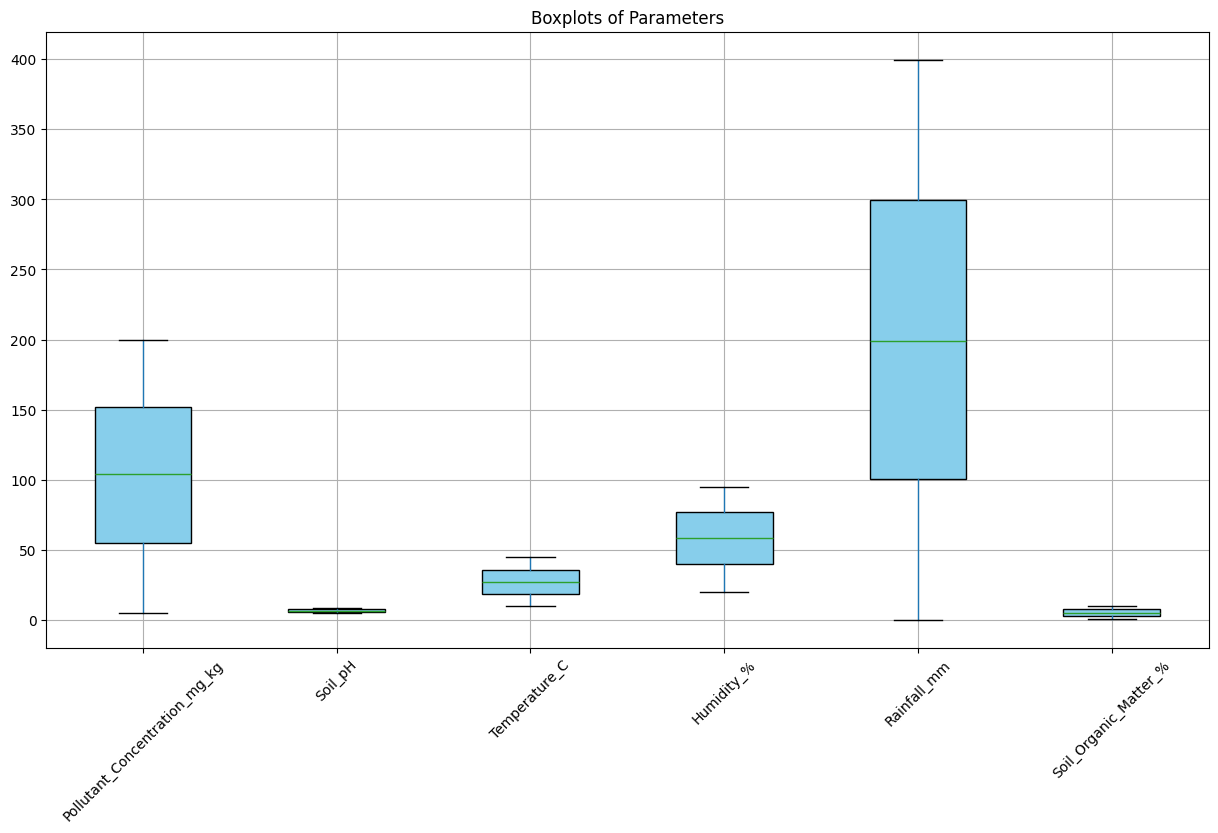

In [ ]:
plt.figure(figsize=(15, 8))
df_normalized[numerical_cols].boxplot(patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.xticks(rotation=45)
plt.title("Boxplots of Parameters")
plt.show()

Reduces right-skewness in data to make it more normally distributed for better modeling

In [ ]:
df_log = df.copy()
df_log[numerical_cols] = np.log1p(df[numerical_cols])
print(df_log[numerical_cols].describe())
df_log[numerical_cols]

       Pollutant_Concentration_mg_kg      Soil_pH  Temperature_C   Humidity_%  \
count                    3000.000000  3000.000000    3000.000000  3000.000000   
mean                        4.417873     1.997616       3.268066     4.005694   
std                         0.772702     0.158631       0.393762     0.406431   
min                         1.796747     1.704748       2.397895     3.044522   
25%                         4.015031     1.865242       2.970414     3.711130   
50%                         4.654769     2.008214       3.332205     4.085135   
75%                         5.026984     2.138889       3.606176     4.354141   
max                         5.303255     2.251292       3.828641     4.564348   

       Rainfall_mm  Soil_Organic_Matter_%  
count  3000.000000            3000.000000  
mean      5.015908               1.696442  
std       0.943974               0.531810  
min       0.000000               0.405465  
25%       4.621044               1.324419  
50%   

,Pollutant_Concentration_mg_kg,Soil_pH,Temperature_C,Humidity_%,Rainfall_mm,Soil_Organic_Matter_%
0,4.369954,2.230014,3.600048,4.188138,4.149464,1.091923
1,2.852439,2.192770,3.465736,4.305416,2.219203,2.371178
2,5.125926,1.848455,2.856470,3.549617,4.809742,1.870263
3,4.502362,1.896119,3.478158,3.449988,4.769837,1.605430
4,4.553140,2.156403,2.890372,4.087656,5.472271,0.662688
...,...,...,...,...,...,...
2995,2.725890,2.086914,2.587764,4.330733,5.378052,1.220830
2996,4.711420,1.829376,3.273364,4.394449,5.224671,1.068153
2997,4.991452,1.832581,3.605498,4.043051,5.206750,2.260721
2998,4.971063,1.728109,3.063391,4.457830,2.116256,1.899118


IQR method


In [ ]:
# IQR-based anomaly detection
Q1 = df_normalized['Pollutant_Concentration_mg_kg'].quantile(0.25)
Q3 = df_normalized['Pollutant_Concentration_mg_kg'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nIQR Analysis for Pollutant Concentration:")
print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")

df_normalized['Anomaly_IQR'] = (
    (df_normalized['Pollutant_Concentration_mg_kg'] < lower_bound) |
    (df_normalized['Pollutant_Concentration_mg_kg'] > upper_bound)
)


IQR Analysis for Pollutant Concentration:
Q1 (25th percentile): 54.42
Q3 (75th percentile): 151.47
IQR: 97.05
Lower Bound: -91.15
Upper Bound: 297.04


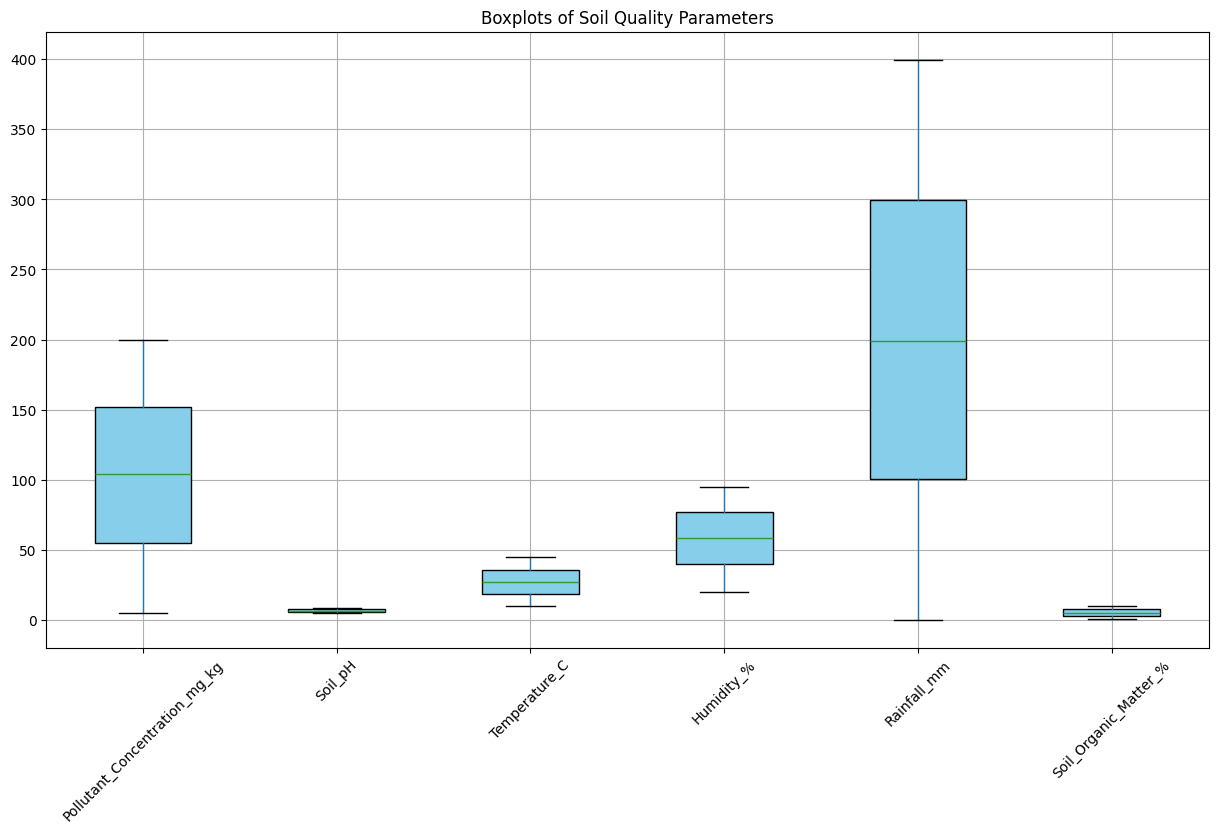

In [ ]:
plt.figure(figsize=(15, 8))
df_normalized[numerical_cols].boxplot(patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.xticks(rotation=45)
plt.title("Boxplots of Soil Quality Parameters")
plt.show()

Marks top 10% and 5% pollutant concentrations for hotspot prioritization.

In [ ]:

df_normalized['High_Pollutant'] = df_normalized['Pollutant_Concentration_mg_kg'] >= df_normalized['Pollutant_Concentration_mg_kg'].quantile(0.90)
df_normalized['Critical_Pollutant'] = df_normalized['Pollutant_Concentration_mg_kg'] >= df_normalized['Pollutant_Concentration_mg_kg'].quantile(0.95)
print(f"\nAnomalies detected (IQR method): {df_normalized['Anomaly_IQR'].sum()}")
print(f"High pollutant areas (top 10%): {df_normalized['High_Pollutant'].sum()}")
print(f"Critical pollutant areas (top 5%): {df_normalized['Critical_Pollutant'].sum()}")


Anomalies detected (IQR method): 0
High pollutant areas (top 10%): 300
Critical pollutant areas (top 5%): 150


Weighted risk index based on pollutant level, pH imbalance, and organic matter quality.

In [ ]:
df_normalized['Contamination_Risk_Score'] = (
    np.abs(df_normalized['Pollutant_Concentration_mg_kg_zscore']) * 0.5 +
    np.abs(df_normalized['Soil_pH_zscore']) * 0.2 +
    np.abs(df_normalized['Soil_Organic_Matter_%_zscore']) * 0.3
)

print("\n EQUAL WIDTH BINNING")
df_normalized['Risk_Category_EqualWidth'] = pd.cut(
    df_normalized['Contamination_Risk_Score'],
    bins=4,
    labels=['Low', 'Moderate', 'High', 'Critical'],
    include_lowest=True
)
print(df_normalized['Risk_Category_EqualWidth'].value_counts().sort_index())


 EQUAL WIDTH BINNING
Risk_Category_EqualWidth
Low          261
Moderate    1164
High        1235
Critical     340
Name: count, dtype: int64


Lists most polluted regions

In [ ]:
#Identify top contamination hotspots
hotspots = df_normalized[df_normalized['High_Pollutant'] == True].copy()
hotspots = hotspots.sort_values('Pollutant_Concentration_mg_kg', ascending=False)

print("TOP 15 CONTAMINATION HOTSPOTS:")

hotspot_display = hotspots[['Region', 'Pollutant_Type', 'Pollutant_Concentration_mg_kg',
                            'Soil_pH', 'Disease_Type', 'Disease_Severity',
                            'Farming_Practice']].head(15)

print(hotspot_display.to_string())


TOP 15 CONTAMINATION HOTSPOTS:
             Region Pollutant_Type  Pollutant_Concentration_mg_kg  Soil_pH              Disease_Type Disease_Severity Farming_Practice
2603  North America       Chromium                         199.99     6.24     Neurological Disorder           Severe          Organic
2495  North America     Pesticides                         199.96     6.47     Neurological Disorder           Severe          Organic
244          Europe           Lead                         199.89     4.69        Respiratory Issues             Mild       Integrated
567   South America       Chromium                         199.78     5.81                    Cancer         Moderate          Organic
1912  North America     Pesticides                         199.72     6.23              Skin Disease         Moderate       Integrated
2325         Africa           Lead                         199.55     7.51              Skin Disease           Severe     Permaculture
1729  South America     

In [ ]:
print("CONTAMINATION HOTSPOTS BY REGION:")
regional_hotspots = df_normalized.groupby('Region').agg({
    'Anomaly_IQR': 'sum',
    'High_Pollutant': 'sum',
    'Contamination_Risk_Score': 'mean',
    'Pollutant_Concentration_mg_kg': 'mean'
}).round(2)
regional_hotspots.columns = ['IQR_Anomalies', 'High_Risk_Cases', 'Avg_Risk_Score', 'Avg_Pollutant_Conc']
print(regional_hotspots.sort_values('Avg_Risk_Score', ascending=False))

CONTAMINATION HOTSPOTS BY REGION:
               IQR_Anomalies  High_Risk_Cases  Avg_Risk_Score  \
Region                                                          
Europe                     0               50            0.89   
South America              0               47            0.87   
Asia                       0               55            0.86   
Africa                     0               50            0.86   
North America              0               56            0.86   
Australia                  0               42            0.85   

               Avg_Pollutant_Conc  
Region                             
Europe                     102.84  
South America              101.26  
Asia                       105.42  
Africa                     104.14  
North America              103.78  
Australia                   98.75  


Final statistical and analytical summary to support interpretation of soil and disease patterns

In [ ]:
print("Summary and Insights")

print("\n1. OVERALL DATASET STATISTICS:")
print(f" Total Records: {len(df_normalized)}")
print(f" Total Columns: {len(df_normalized.columns)}")
print(f"Numerical Features: {len(numerical_cols)}")
print(f"Categorical Features: {len(df_normalized.columns) - len(numerical_cols)}")

print("\n2. POLLUTANT ANALYSIS:")
print(f" Average Pollutant Concentration: {df_normalized['Pollutant_Concentration_mg_kg'].mean():.2f} mg/kg")
print(f"Maximum Pollutant Concentration: {df_normalized['Pollutant_Concentration_mg_kg'].max():.2f} mg/kg")
print(f"Minimum Pollutant Concentration: {df_normalized['Pollutant_Concentration_mg_kg'].min():.2f} mg/kg")
print(f"Standard Deviation: {df_normalized['Pollutant_Concentration_mg_kg'].std():.2f} mg/kg")

print("\n3. CONTAMINATION HOTSPOTS:")
print(f"High Risk Areas (Top 10%): {df_normalized['High_Pollutant'].sum()}")
print(f"Critical Risk Areas (Top 5%): {df_normalized['Critical_Pollutant'].sum()}")
print(f"Most affected region: {df_normalized.groupby('Region')['Pollutant_Concentration_mg_kg'].mean().idxmax()}")

print("\n4. DISEASE ANALYSIS:")
print("Disease Type Distribution:")
for disease, count in df_normalized['Disease_Type'].value_counts().items():
    print(f"{disease}: {count} cases ({count/len(df_normalized)*100:.1f}%)")

print("\n Disease Severity Distribution:")
for severity, count in df_normalized['Disease_Severity'].value_counts().items():
    print(f"{severity}: {count} cases ({count/len(df_normalized)*100:.1f}%)")

print("\n5. ENVIRONMENTAL FACTORS:")
print(f"Average Soil pH: {df_normalized['Soil_pH'].mean():.2f}")
print(f"Average Temperature: {df_normalized['Temperature_C'].mean():.2f}°C")
print(f"Average Humidity: {df_normalized['Humidity_%'].mean():.2f}%")
print(f"Average Rainfall: {df_normalized['Rainfall_mm'].mean():.2f} mm")

print("\n6. POLLUTANT TYPE ANALYSIS:")
pollutant_stats = df_normalized.groupby('Pollutant_Type').agg({
    'Pollutant_Concentration_mg_kg': ['mean', 'max', 'count']
}).round(2)
pollutant_stats.columns = ['Avg_Concentration', 'Max_Concentration', 'Count']
print(pollutant_stats.sort_values('Avg_Concentration', ascending=False))

print("\n7. REGIONAL RISK ASSESSMENT:")
regional_risk = df_normalized.groupby('Region').agg({
    'Pollutant_Concentration_mg_kg': 'mean',
    'High_Pollutant': 'sum',
    'Disease_Type': 'count'
}).round(2)
regional_risk.columns = ['Avg_Pollutant', 'High_Risk_Cases', 'Total_Cases']
print(regional_risk.sort_values('Avg_Pollutant', ascending=False))


Summary and Insights

1. OVERALL DATASET STATISTICS:
 Total Records: 3000
 Total Columns: 29
Numerical Features: 6
Categorical Features: 23

2. POLLUTANT ANALYSIS:
 Average Pollutant Concentration: 102.75 mg/kg
Maximum Pollutant Concentration: 199.99 mg/kg
Minimum Pollutant Concentration: 5.03 mg/kg
Standard Deviation: 55.91 mg/kg

3. CONTAMINATION HOTSPOTS:
High Risk Areas (Top 10%): 300
Critical Risk Areas (Top 5%): 150
Most affected region: Asia

4. DISEASE ANALYSIS:
Disease Type Distribution:
Cancer: 622 cases (20.7%)
Skin Disease: 622 cases (20.7%)
Neurological Disorder: 597 cases (19.9%)
Respiratory Issues: 581 cases (19.4%)
Gastrointestinal Disease: 578 cases (19.3%)

 Disease Severity Distribution:
Severe: 1023 cases (34.1%)
Moderate: 998 cases (33.3%)
Mild: 979 cases (32.6%)

5. ENVIRONMENTAL FACTORS:
Average Soil pH: 6.46
Average Temperature: 27.23°C
Average Humidity: 58.22%
Average Rainfall: 200.32 mm

6. POLLUTANT TYPE ANALYSIS:
                Avg_Concentration  Max_Concen

Bar chart to show frequency of each disease type

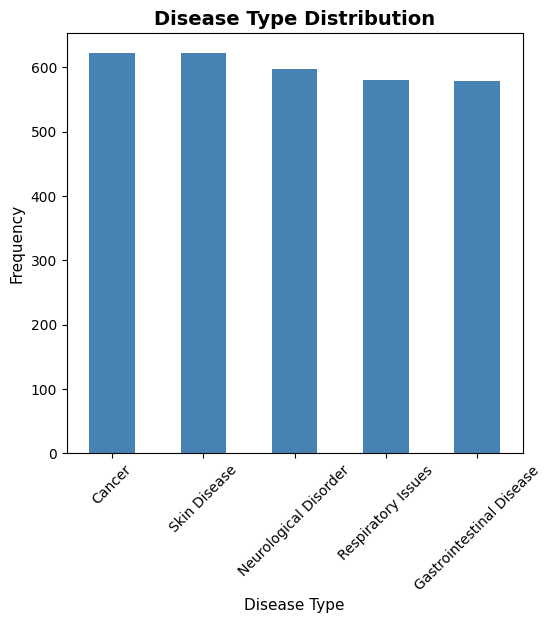

In [ ]:
plt.close('all')
plt.figure(figsize=(20,12))
#  Bar Chart
ax1 = plt.subplot(2, 3, 1)
disease_counts = df_normalized['Disease_Type'].value_counts()
disease_counts.plot(kind='bar', color='steelblue', ax=ax1)
ax1.set_title('Disease Type Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Disease Type', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.tick_params(axis='x', rotation=45)

Scatter plot reveals correlation between soil acidity and pollutant levels

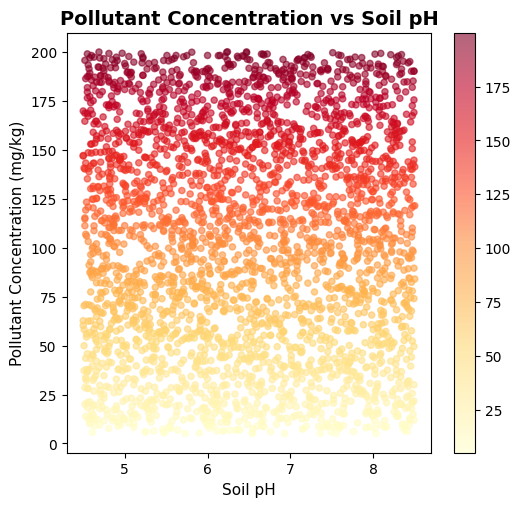

In [ ]:
# 2. Scatter Plot
plt.close('all')
plt.figure(figsize=(20,12))
ax2 = plt.subplot(2, 3, 2)
scatter = ax2.scatter(df_normalized['Soil_pH'],
                     df_normalized['Pollutant_Concentration_mg_kg'],
                     c=df_normalized['Pollutant_Concentration_mg_kg'],
                     cmap='YlOrRd', alpha=0.6, s=20)
ax2.set_title('Pollutant Concentration vs Soil pH', fontsize=14, fontweight='bold')
ax2.set_xlabel('Soil pH', fontsize=11)
ax2.set_ylabel('Pollutant Concentration (mg/kg)', fontsize=11)
plt.colorbar(scatter, ax=ax2)


To show how mean pollutant levels vary across regions.
Highlights which areas have higher contamination on average.

<Figure size 2000x1200 with 0 Axes>

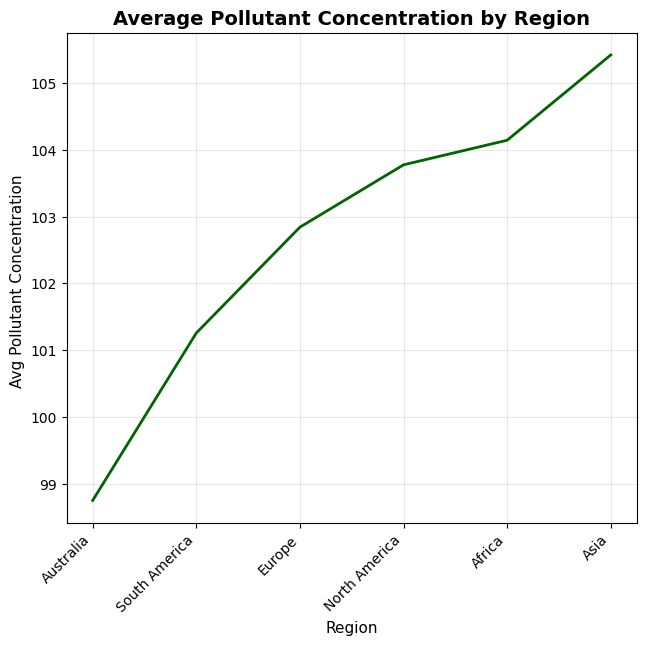

In [ ]:
# 3. Line Chart
plt.close('all')
plt.figure(figsize=(20,12))
fig = plt.figure(figsize=(25, 14))
ax3 = plt.subplot(2, 3, 3)
region_pollution = df_normalized.groupby('Region')['Pollutant_Concentration_mg_kg'].mean().sort_values()
ax3.plot(range(len(region_pollution)), region_pollution.values, linewidth=2, markersize=8, color='darkgreen')
ax3.set_title('Average Pollutant Concentration by Region', fontsize=14, fontweight='bold')
ax3.set_xlabel('Region', fontsize=11)
ax3.set_ylabel('Avg Pollutant Concentration ', fontsize=11)
ax3.set_xticks(range(len(region_pollution)))
ax3.set_xticklabels(region_pollution.index, rotation=45, ha='right')
ax3.grid(True, alpha=0.3)

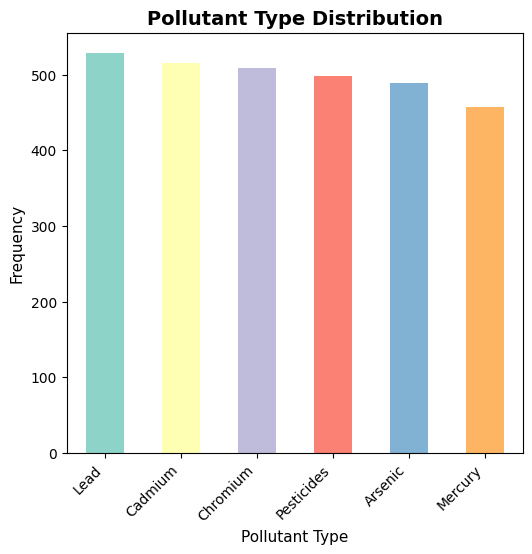

In [ ]:
# 4. Bar Chart
plt.close('all')
plt.figure(figsize=(20,12))
ax4 = plt.subplot(2, 3, 4)
pollutant_counts = df_normalized['Pollutant_Type'].value_counts()
colors = plt.cm.Set3(range(len(pollutant_counts)))
pollutant_counts.plot(kind='bar', color=colors, ax=ax4,alpha=0.99)
ax4.set_title('Pollutant Type Distribution', fontsize=14, fontweight='bold')
ax4.set_xlabel('Pollutant Type', fontsize=11)
ax4.set_ylabel('Frequency', fontsize=11)
ax4.tick_params(axis='x', rotation=45)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.show()

To explore the relationship between temperature and humidity levels.
Helps check if there’s any visible trend or pattern—like whether higher temperatures correspond to higher or lower humidity.

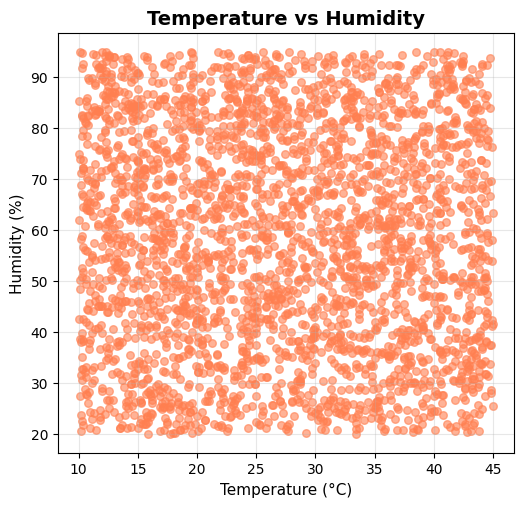

In [ ]:
#  Scatter Plot
plt.close('all')
plt.figure(figsize=(20,12))
ax5 = plt.subplot(2, 3, 5)
ax5.scatter(df_normalized['Temperature_C'], df_normalized['Humidity_%'],
           alpha=0.6, c='coral', s=30)
ax5.set_title('Temperature vs Humidity', fontsize=14, fontweight='bold')
ax5.set_xlabel('Temperature (°C)', fontsize=11)
ax5.set_ylabel('Humidity (%)', fontsize=11)
ax5.grid(True, alpha=0.3)

To show how disease severity levels (Mild, Moderate, Severe) are distributed across the dataset.



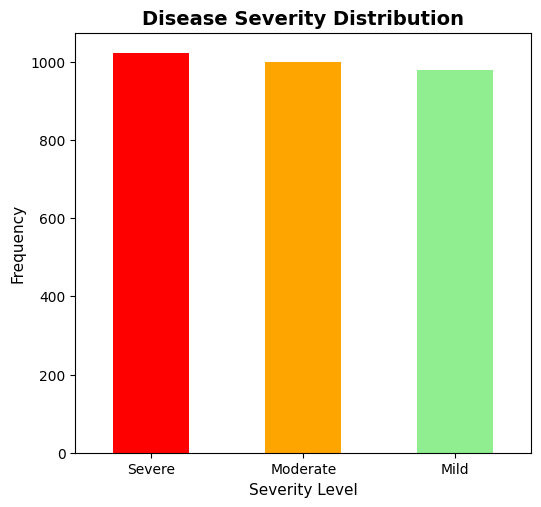

In [ ]:
#Bar Chart
plt.close('all')
plt.figure(figsize=(20,12))
ax6 = plt.subplot(2, 3, 6)
severity_counts = df_normalized['Disease_Severity'].value_counts()
colors_severity = {'Mild': 'lightgreen', 'Moderate': 'orange', 'Severe': 'red'}
colors_list = [colors_severity.get(x, 'gray') for x in severity_counts.index]
severity_counts.plot(kind='bar', color=colors_list, ax=ax6)
ax6.set_title('Disease Severity Distribution', fontsize=14, fontweight='bold')
ax6.set_xlabel('Severity Level', fontsize=11)
ax6.set_ylabel('Frequency', fontsize=11)
ax6.tick_params(axis='x', rotation=0)


To visualize how pollutant concentration values are spread across samples.

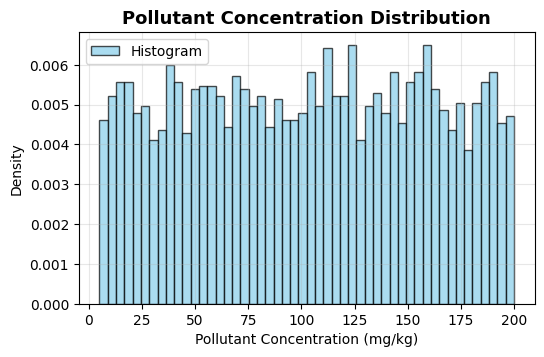

In [ ]:
#  Histogram
plt.close('all')
plt.figure(figsize=(20,12))
ax1 = plt.subplot(3, 3, 1)
ax1.hist(df_normalized['Pollutant_Concentration_mg_kg'], bins=50, color='skyblue',
         edgecolor='black', alpha=0.7, density=True, label='Histogram')
ax1.set_title('Pollutant Concentration Distribution', fontsize=13, fontweight='bold')
ax1.set_xlabel('Pollutant Concentration (mg/kg)', fontsize=10)
ax1.set_ylabel('Density', fontsize=10)
ax1.legend()
ax1.grid(True, alpha=0.3)

To examine how soil pH values are distributed in the dataset.
Soil pH influences pollutant mobility and crop health; identifying skew or imbalance helps interpret environmental conditions.


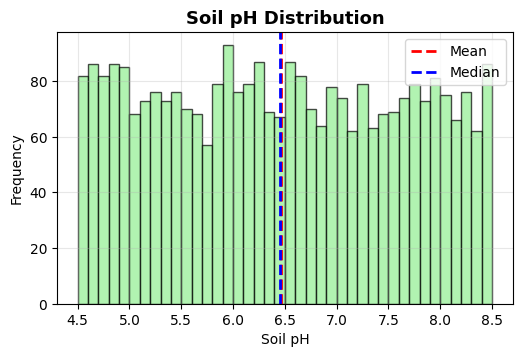

In [ ]:
#  Histogram
plt.close('all')
plt.figure(figsize=(20,12))
ax2 = plt.subplot(3, 3, 2)
ax2.hist(df_normalized['Soil_pH'], bins=40, color='lightgreen', edgecolor='black', alpha=0.7)
ax2.axvline(df_normalized['Soil_pH'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
ax2.axvline(df_normalized['Soil_pH'].median(), color='blue', linestyle='--', linewidth=2, label='Median')
ax2.set_title('Soil pH Distribution', fontsize=13, fontweight='bold')
ax2.set_xlabel('Soil pH', fontsize=10)
ax2.set_ylabel('Frequency', fontsize=10)
ax2.legend()
ax2.grid(True, alpha=0.3)

To understand how temperature values are distributed across the dataset.
Temperature affects pollutant volatility and microbial activity in soil; identifying normal ranges or anomalies helps interpret environmental behavior.


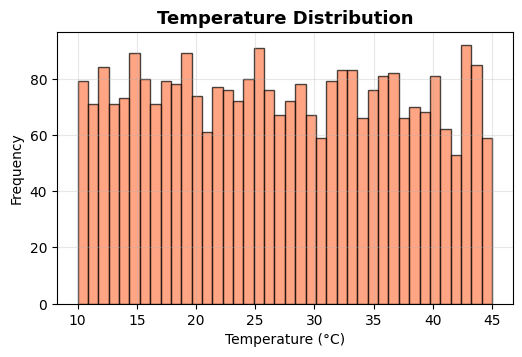

In [ ]:
# Histogram
plt.close('all')
plt.figure(figsize=(20,12))
ax3 = plt.subplot(3, 3, 3)
ax3.hist(df_normalized['Temperature_C'], bins=40, color='coral', edgecolor='black', alpha=0.7)
ax3.set_title('Temperature Distribution', fontsize=13, fontweight='bold')
ax3.set_xlabel('Temperature (°C)', fontsize=10)
ax3.set_ylabel('Frequency', fontsize=10)
ax3.grid(True, alpha=0.3)

To understand relationships between key environmental variables

Text(0.5, 1.0, 'Correlation Heatmap')

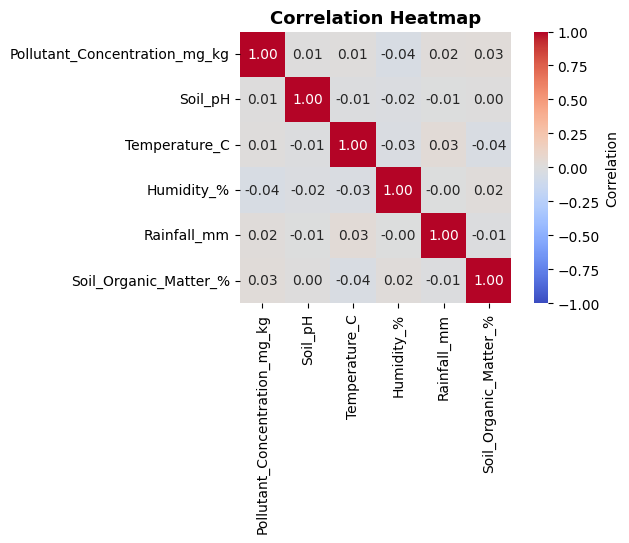

In [ ]:
#Heatmap
plt.close('all')
plt.figure(figsize=(20,12))
ax4 = plt.subplot(3, 3, 4)

numerical_features = ['Pollutant_Concentration_mg_kg', 'Soil_pH', 'Temperature_C',
                      'Humidity_%', 'Rainfall_mm', 'Soil_Organic_Matter_%']

corr_matrix = df_normalized[numerical_features].corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f',
            cmap='coolwarm', center=0,
            vmin=-1, vmax=1,   # <-- This fixes color darkness
            square=True, ax=ax4,
            cbar_kws={'label': 'Correlation'})

ax4.set_title('Correlation Heatmap', fontsize=13, fontweight='bold')


To compare the distribution shapes of key continuous variables (Pollutant, Soil pH, Temperature).

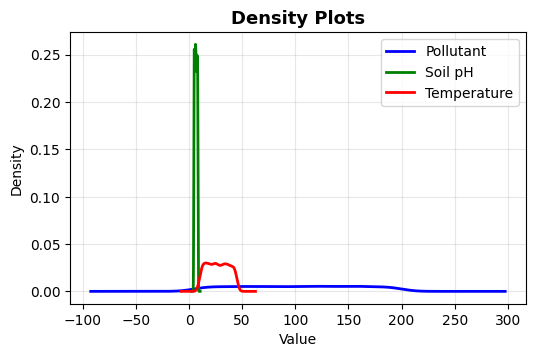

In [ ]:
#Density Plots
plt.close('all')
plt.figure(figsize=(20,12))
ax5 = plt.subplot(3, 3, 5)
df_normalized['Pollutant_Concentration_mg_kg'].plot(kind='density', color='blue', linewidth=2, label='Pollutant', ax=ax5)
df_normalized['Soil_pH'].plot(kind='density', color='green', linewidth=2, label='Soil pH', ax=ax5)
df_normalized['Temperature_C'].plot(kind='density', color='red', linewidth=2, label='Temperature', ax=ax5)
ax5.set_title('Density Plots', fontsize=13, fontweight='bold')
ax5.set_xlabel('Value', fontsize=10)
ax5.legend()
ax5.grid(True, alpha=0.3)


Text(0.5, 1.0, 'Avg Pollutant: Region vs Type')

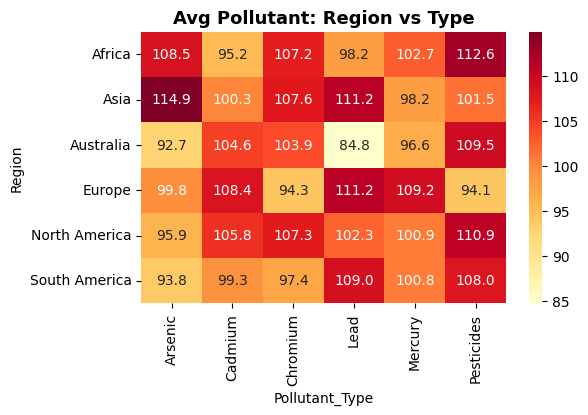

In [ ]:
# Region vs Pollutant Type Heatmap
plt.close('all')
plt.figure(figsize=(20,12))
ax6 = plt.subplot(3, 3, 6)
pivot_table = df_normalized.pivot_table(values='Pollutant_Concentration_mg_kg',
                                        index='Region', columns='Pollutant_Type', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax6)
ax6.set_title('Avg Pollutant: Region vs Type', fontsize=13, fontweight='bold')



Rainfall influences multiple environmental factors such as soil pH, humidity, and pollutant dispersion.
Checking its distribution helps identify skewness or extreme weather conditions that might affect analysis.

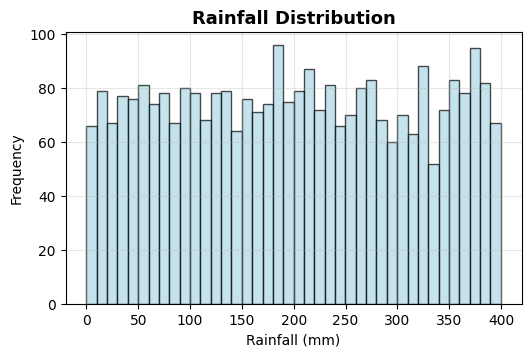

In [ ]:
# Rainfall Histogram
plt.close('all')
plt.figure(figsize=(20,12))
ax7 = plt.subplot(3, 3, 7)
ax7.hist(df_normalized['Rainfall_mm'], bins=40, color='lightblue', edgecolor='black', alpha=0.7)
ax7.set_title('Rainfall Distribution', fontsize=13, fontweight='bold')
ax7.set_xlabel('Rainfall (mm)', fontsize=10)
ax7.set_ylabel('Frequency', fontsize=10)
ax7.grid(True, alpha=0.3)

To examine the distribution of soil organic matter across samples.
Soil organic matter affects fertility, pollutant retention, and overall soil health.

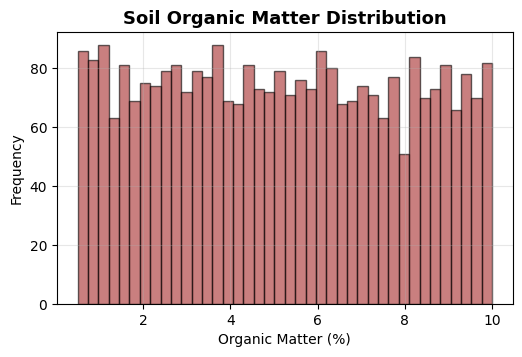

In [ ]:
# 8. Soil Organic Matter histogram
plt.close('all')
plt.figure(figsize=(20,12))
ax8 = plt.subplot(3, 3, 8)
ax8.hist(df_normalized['Soil_Organic_Matter_%'], bins=40, color='brown', edgecolor='black', alpha=0.6)
ax8.set_title('Soil Organic Matter Distribution', fontsize=13, fontweight='bold')
ax8.set_xlabel('Organic Matter (%)', fontsize=10)
ax8.set_ylabel('Frequency', fontsize=10)
ax8.grid(True, alpha=0.3)

To analyze how different pollutant types are associated with varying levels of disease severity

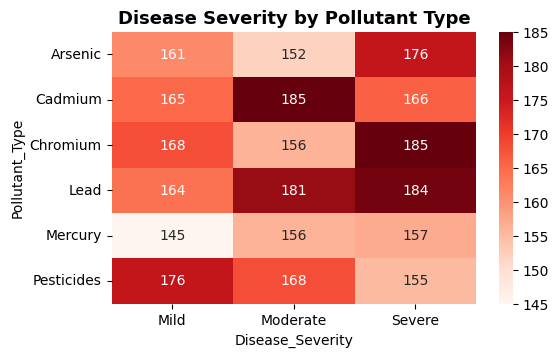

In [ ]:
#  Disease Severity
plt.close('all')
plt.figure(figsize=(20,12))
ax9 = plt.subplot(3, 3, 9)
disease_pollutant = pd.crosstab(df_normalized['Pollutant_Type'], df_normalized['Disease_Severity'])
sns.heatmap(disease_pollutant, annot=True, fmt='d', cmap='Reds', ax=ax9)
ax9.set_title('Disease Severity by Pollutant Type', fontsize=13, fontweight='bold')
plt.show()


 To compare the distribution and variability of pollutant concentrations across regions.
Box plots reveal outliers, medians, and interquartile ranges — useful for identifying regions with extreme pollution levels or consistent concentrations.


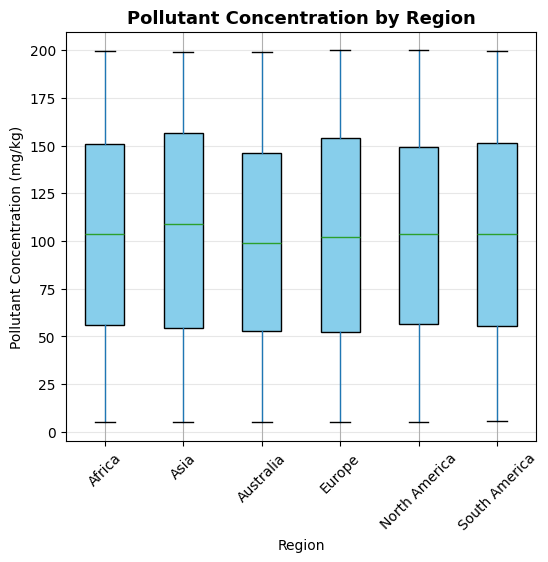

In [ ]:
#  Box Plot
plt.close('all')
plt.figure(figsize=(20,12))
ax1 = plt.subplot(2, 3, 1)
df_normalized.boxplot(column='Pollutant_Concentration_mg_kg', by='Region', ax=ax1, patch_artist=True, boxprops=dict(facecolor='skyblue'))
ax1.set_title('Pollutant Concentration by Region', fontsize=13, fontweight='bold')
ax1.set_xlabel('Region', fontsize=10)
ax1.set_ylabel('Pollutant Concentration (mg/kg)', fontsize=10)
plt.suptitle('')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

Purpose: To compare how different farming practices are distributed across regions.
Regional variation in agricultural methods can influence soil quality, pollutant levels, and crop disease outcomes.


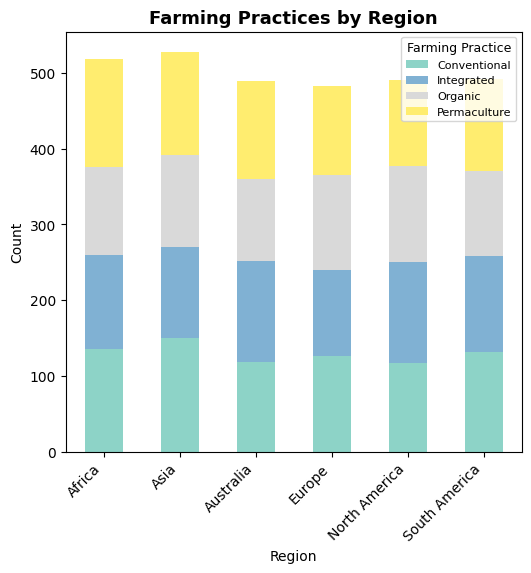

In [ ]:
# Stacked Bar Chart
plt.close('all')
plt.figure(figsize=(20,12))
ax3 = plt.subplot(2, 3, 3)
farming_region = pd.crosstab(df_normalized['Region'], df_normalized['Farming_Practice'])
farming_region.plot(kind='bar', stacked=True, ax=ax3, colormap='Set3')
ax3.set_title('Farming Practices by Region', fontsize=13, fontweight='bold')
ax3.set_xlabel('Region', fontsize=10)
ax3.set_ylabel('Count', fontsize=10)
ax3.legend(title='Farming Practice', fontsize=8, title_fontsize=9)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.show()


To visualize interactions among Soil pH, Temperature, Pollutant Concentration, and Rainfall simultaneously.
This plot reveals multi-dimensional patterns — for example, how temperature and soil pH jointly vary with pollution and rainfall.


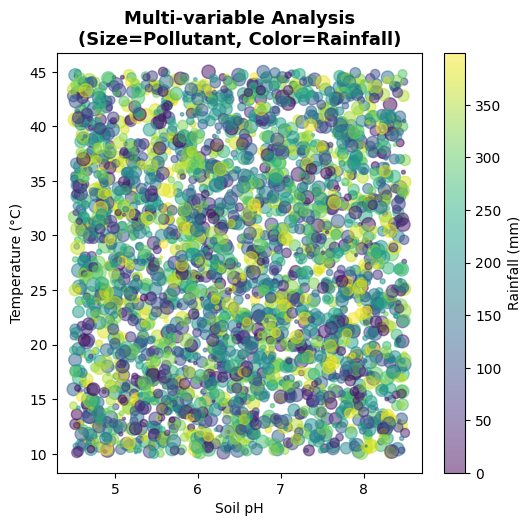

In [ ]:
#  Scatter with size
plt.close('all')
plt.figure(figsize=(20,12))
ax4 = plt.subplot(2, 3, 4)
scatter = ax4.scatter(df_normalized['Soil_pH'],
                     df_normalized['Temperature_C'],
                     s=df_normalized['Pollutant_Concentration_mg_kg']/2,
                     c=df_normalized['Rainfall_mm'],
                     cmap='viridis', alpha=0.5)
ax4.set_title('Multi-variable Analysis\n(Size=Pollutant, Color=Rainfall)', fontsize=13, fontweight='bold')
ax4.set_xlabel('Soil pH', fontsize=10)
ax4.set_ylabel('Temperature (°C)', fontsize=10)
plt.colorbar(scatter, ax=ax4, label='Rainfall (mm)')
plt.show()

To compare how frequently each disease occurs at different severity levels.
Highlights which diseases are most prevalent and which tend to appear in more severe forms.

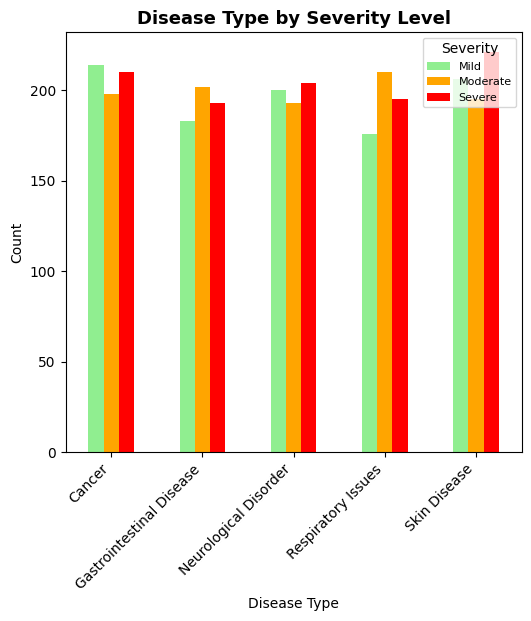

In [ ]:
# Grouped Bar Chart
plt.close('all')
plt.figure(figsize=(20,12))
ax5 = plt.subplot(2, 3, 5)
disease_severity = pd.crosstab(df_normalized['Disease_Type'], df_normalized['Disease_Severity'])
disease_severity.plot(kind='bar', ax=ax5, color=['lightgreen', 'orange', 'red'])
ax5.set_title('Disease Type by Severity Level', fontsize=13, fontweight='bold')
ax5.set_xlabel('Disease Type', fontsize=10)
ax5.set_ylabel('Count', fontsize=10)
ax5.legend(title='Severity', fontsize=8)
plt.setp(ax5.xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.show()


To visualize how pollutant concentration levels vary across regions and crop types.
Quickly identifies pollution hotspots and vulnerable crop–region combinations.

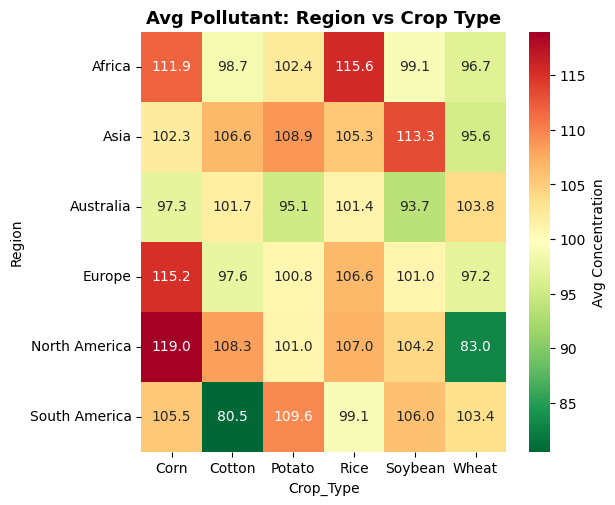

In [ ]:
# Heatmap
plt.close('all')
plt.figure(figsize=(20,12))
ax6 = plt.subplot(2, 3, 6)
risk_heatmap = df_normalized.pivot_table(values='Pollutant_Concentration_mg_kg',
                                         index='Region', columns='Crop_Type', aggfunc='mean')
sns.heatmap(risk_heatmap, annot=True, fmt='.1f', cmap='RdYlGn_r', ax=ax6,
            cbar_kws={'label': 'Avg Concentration'})
ax6.set_title('Avg Pollutant: Region vs Crop Type', fontsize=13, fontweight='bold')
plt.show()




1. The Worst Outcome is the Most Common: The largest group of patients (34.1%) suffers from the 'Severe' disease severity.

2. Risk is Guaranteed: Two-thirds of all cases (67.4%) result in serious or life-threatening consequences (Severe or Moderate).

3. One Poison, Five Diseases: The pollution causes a multi-system health crisis, hitting Cancer, Skin, Neurological, Respiratory, and Gut systems almost equally.

4. Farm Chemicals are the Biggest Load: Pesticides hold the highest average concentration (105.94 mg/kg), making them the mass leader in soil contamination.

5. The Silent Killers: Arsenic and Mercury are the most potent poisons, causing disease at the lowest average concentrations recorded.

6. Lead is Everywhere: Lead is the most prevalent problem, linked to the highest number of recorded cases (529).

7. "Super Hotspots" Exist: Pollution is not spread evenly; massive variation proves the existence of extreme, isolated hotspots far more dangerous than the average site.

8. Asia is the Epicenter: Asia leads globally in both total cases (528) and average pollution concentration (105.42 mg/kg).

9. North America Gets Sick Faster: Despite lower pollution, North America has the highest count of intense 'High-Risk' cases (56).

10. German Anomaly: Cases link the developed nation Germany to pollution incidents in the Africa region.

11. U.S. Anomaly: Cases link the USA to pollution incidents in the Asia region.  

12. Australia is the Only Exception: Australia is the only region that successfully kept its average pollution concentration below 100 mg/kg.

13. Weather is a Bigger Threat: Rainfall instability is a greater systemic risk factor than the static contaminant concentration itself.

14. Soil Helps the Poison: The average soil is slightly acidic (pH 6.46), which chemically helps heavy metals dissolve and become more dangerous.

15. Absolute Limit Reached: Contamination reached its absolute maximum recorded limit (199.99 mg/kg) at some sites.